# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

C:\Users\aikru\AppData\Local\Temp\ipykernel_20228\3949011577.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

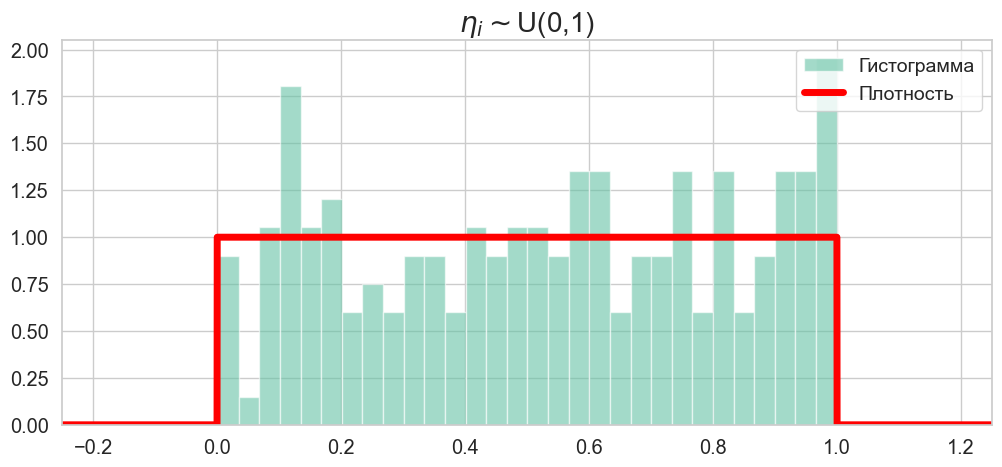

In [3]:
sample = sps.uniform.rvs(size=200)  # 200 независимых СВ из U[0,1]
grid = np.linspace(-0.25, 1.25, 5000)  # сетка для построения графика
plt.figure(figsize=(12,5))
plt.xlim([-0.25, 1.25])
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', lw=5, label='Плотность') 
plt.title(r'$\eta_i \sim$U(0,1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

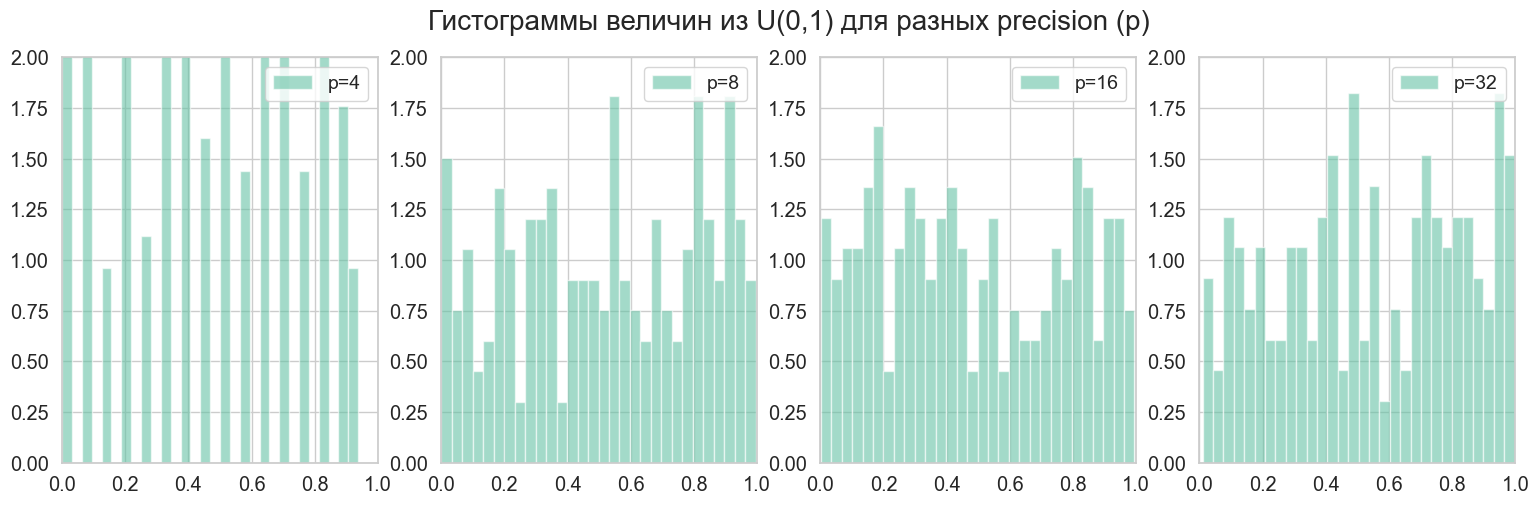

In [4]:
def my_uniform(size=1, precision=30):
    arr = sps.bernoulli.rvs(size=(size, precision), p=0.5)
    arr = arr.astype(float) / 2 / (2 ** np.arange(precision))
    return np.sum(arr, axis=-1)

plt.figure(figsize=(15, 5)) 
plt.title(r'Гистограммы величин из U(0,1) для разных precision (p)', fontsize=20, pad=20)
plt.axis('off')
plt.tight_layout()
for i, p in enumerate([4,8,16,32]):
    plt.subplot(1, 4, i+1)
    ind_rand_values = my_uniform(size=200, precision=p)
    plt.hist(ind_rand_values, bins=30, density=True, alpha=0.6, label=f'p={p}') 
    plt.legend(fontsize=14, loc=1)
    plt.ylim([0, 2])
    plt.xlim([0, 1])
plt.show()

*Видно, что с увеличением precision, уменьшается "дискретность" величины. Все больше промежуточных значений становятся доступными для величины, или, иными словами, минималльный шаг между возможными значениями СВ уменьшается, что делает ее более похожей на величину из равномерного распределения*

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

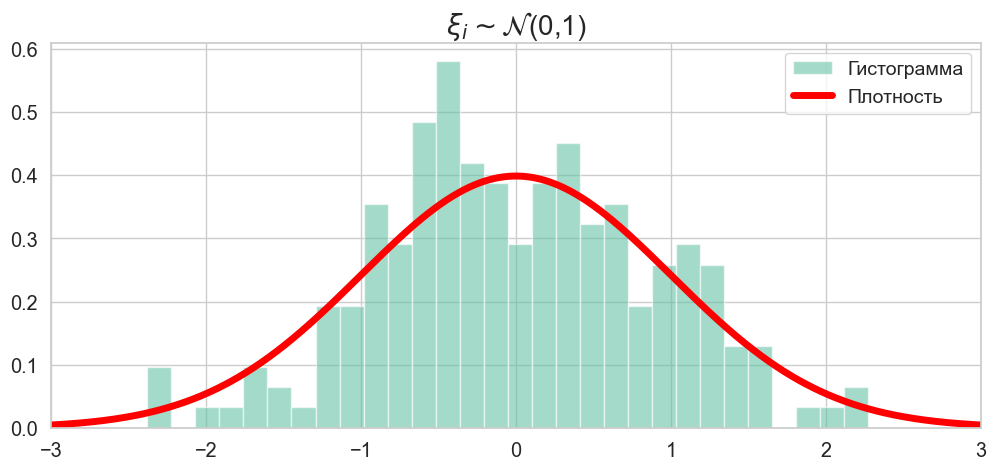

In [5]:
sample = sps.norm.rvs(size=200)  # 200 независимых СВ из U[0,1]
grid = np.linspace(-3, 3, 5000)  # сетка для построения графика
plt.figure(figsize=(12, 5))
plt.xlim([-3, 3])
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма') 
plt.plot(grid, sps.norm.pdf(grid), color='red', lw=5, label='Плотность') 
plt.title(r'$\xi_i \sim \mathcal{N}$(0,1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

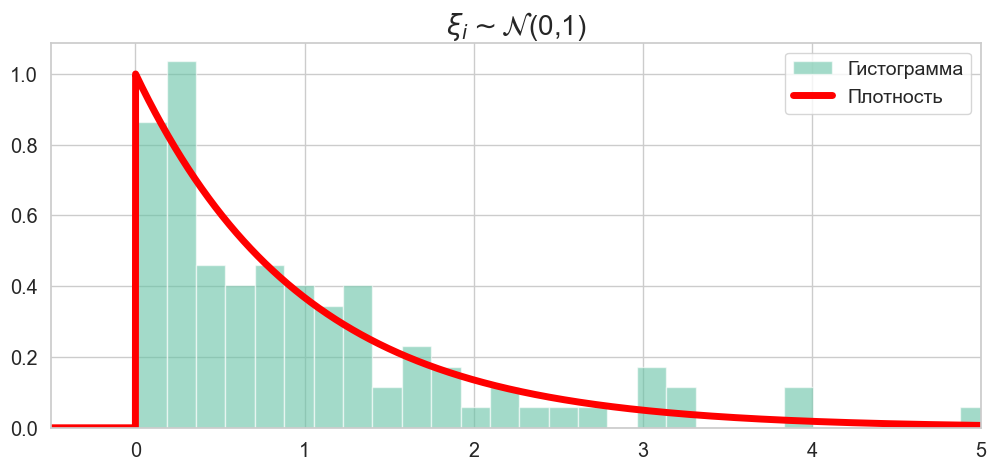

In [6]:
sample = sps.expon.rvs(size=100)
grid = np.linspace(-0.5, 5, 5000)  # сетка для построения графика
plt.figure(figsize=(12, 5))
plt.xlim([-0.5, 5])
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма') 
plt.plot(grid, sps.expon.pdf(grid), color='red', lw=5, label='Плотность') 
plt.title(r'$\xi_i \sim \mathcal{N}$(0,1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

**Выводы:**

*В этой задаче мы изучили, как случайные величины из нескольких популярных распределений можно генерировать на практике. Ряд нетривиальных преобразований позволяет получать из одних распределений другие, что упрощает задачу моделирования случайных величин на компьютере. Это открывает множество возможностей использовать теорию вероятнсотей в анализе данных*

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

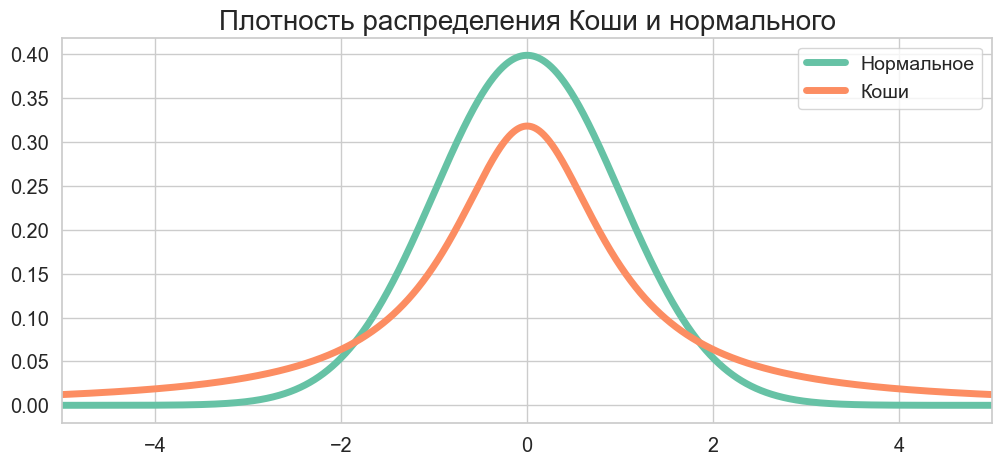

In [7]:
grid = np.linspace(-5, 5, 5000)  # сетка для построения графика
plt.figure(figsize=(12, 5))
plt.xlim([-5, 5])
plt.plot(grid, sps.norm.pdf(grid), lw=5, label='Нормальное') 
plt.plot(grid, sps.cauchy.pdf(grid), lw=5, label='Коши') 
plt.title(r'Плотность распределения Коши и нормального', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

*График плотности нормального распределения проходит выше графика плотности распределения Коши примерно на участке [-2,2] и ниже - в области хвостов. Действительно, распределение Коши обладает массивными хвостами (по крайней мере, в сравнении с нормальным).*  
*Интересно, что распределение Коши не имеет математического ожидания и дисперсии, несмотря на то, что оно визуально напоминает искаженное нормальное и обладает выделяющимся пиком посередине*  

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

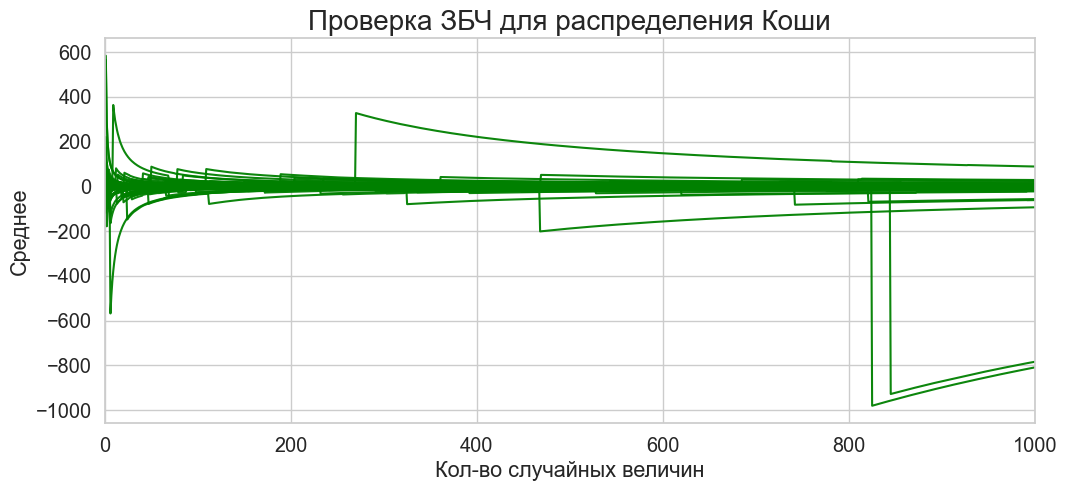

In [8]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок
samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(12, 5))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.95)
plt.title('Проверка ЗБЧ для распределения Коши', fontsize=20)
plt.xlabel("Кол-во случайных величин")
plt.ylabel("Среднее")
plt.xlim((0, size))
plt.show()

*Графики я специально оставил непрозрачными, чтобы все единичные отклонения от "среднего" были заметны (по-моему, так нагляднее)*  
*Видно, что вдоль всей горизонтальной оси возникают сильные отклонения от нуля, т.е. сходимости п.н. к "среднему" не наблюдается. В прочем, это логично, ведь, как упоминаллось ранее, у распределения Коши не определено матожидание, и искомого предела вовсе не существует. Таким образом, закон больших чисел для распределения Коши не выполняется*

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

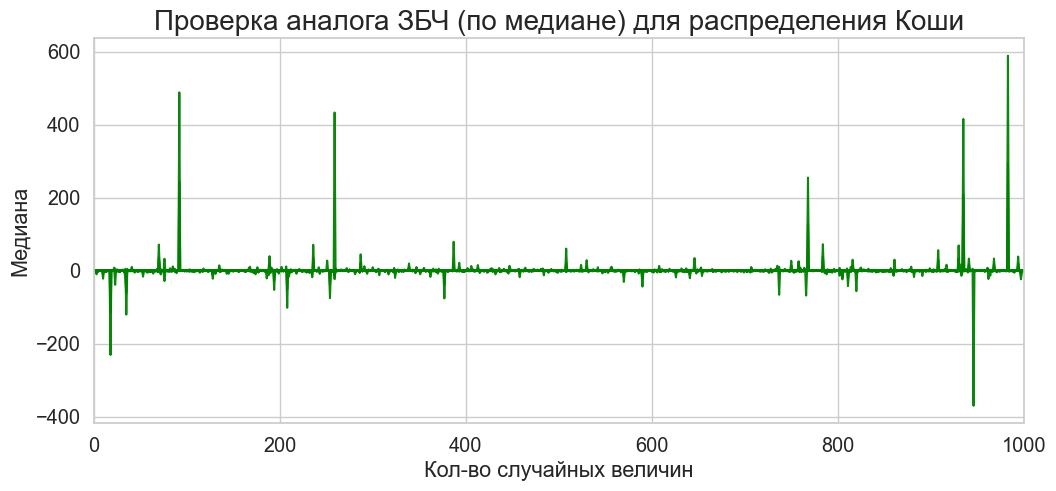

In [14]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок
samples = sps.cauchy().rvs(size=(samples_count, size))
cum_medians = np.array([np.median(samples[:i+1,:], axis=0) for i in range(size)])

plt.figure(figsize=(12, 5))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_medians[i], color="green", alpha=0.95)
plt.title('Проверка аналога ЗБЧ (по медиане) для распределения Коши', fontsize=20)
plt.xlabel("Кол-во случайных величин")
plt.ylabel("Медиана")
plt.xlim((0, size))
plt.show()

*Как и в предыдущем случае, грандиозные выбросы наблюдаются в различных точках вдоль всей горизонтальной оси, что опровергает сходимость п.н. и тут*

**Вывод:**

*В ходе задачи удалось ближе ознакомитсья с распределением Коши. Оно уникально за счет своих тяжелых хвостов, отсутствия матожидания и дисперсии, а также невыполнимости закона больших чисел, что получилось пронаблюдать на практике*

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [10]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок, K в новой терминологии
samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))

Snj = samples.cumsum(axis=1) / (np.arange(size) + 1)
F = (np.abs(Snj - 0.5)).sum(axis=0) / samples_count
n = np.nonzero(np.where(F<=0.02, 1, 0))[0][0]
print(f'n = {n}')

n = 387


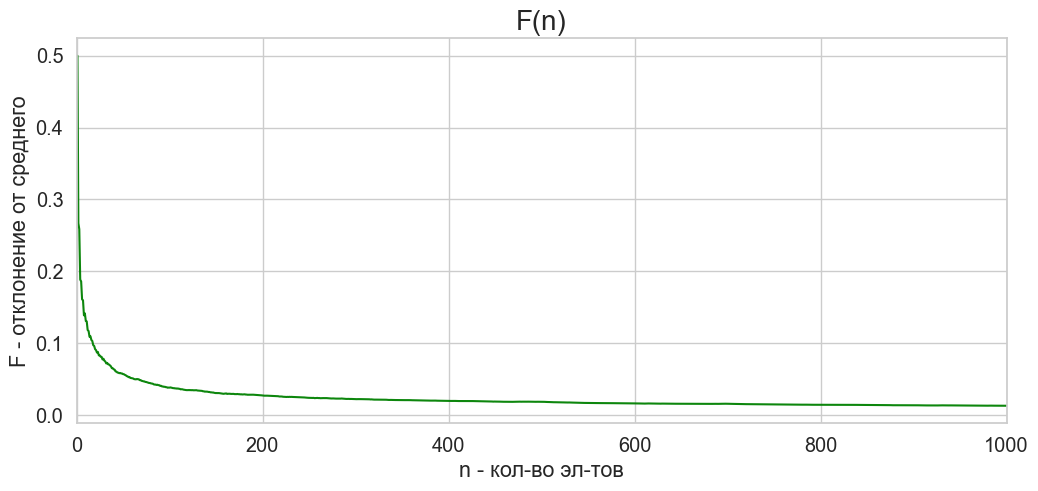

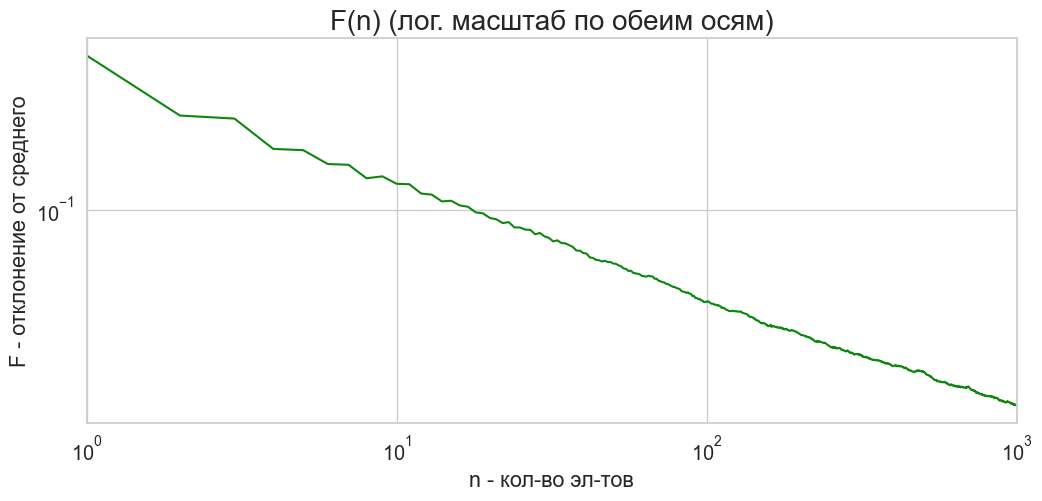

In [11]:
for i, graph in enumerate(['F(n)', 'F(n) (лог. масштаб по обеим осям)']):
    plt.figure(figsize=(12, 5))
    plt.plot(np.arange(size) + 1, F, color="green", alpha=0.95)
    if i == 1:
        plt.xscale('log')
        plt.yscale('log')
    plt.title(graph, fontsize=20)
    plt.xlabel("n - кол-во эл-тов")
    plt.ylabel("F - отклонение от среднего")
    plt.xlim((i, size))
    plt.show()

*По графикам видно, что чем больше данных удалось собрать (или чем больше времени на сбор данных доступно), тем точнее можно оценить среднее*

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

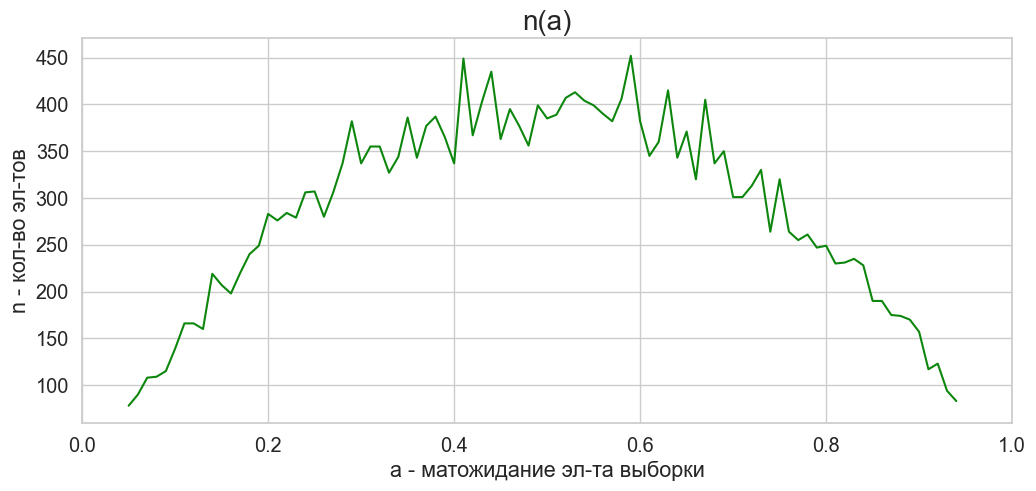

In [12]:
a_s = np.arange(0.05, 0.95, 0.01)  # шаг уменьшил для чуть большей наглядности
n_s = []
for a in a_s:
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    Snj = samples.cumsum(axis=1) / (np.arange(size) + 1)
    F = (np.abs(Snj - a)).sum(axis=0) / samples_count
    try:
        n = np.nonzero(np.where(F<=0.02, 1, 0))[0][0]
    except:
        n = size  # если в итоге не смогли достаточно приблизить
    n_s.append(n)

plt.figure(figsize=(12, 5))
plt.plot(a_s, n_s, color="green", alpha=0.95)
plt.title('n(a)', fontsize=20)
plt.xlabel("a - матожидание эл-та выборки")
plt.ylabel("n - кол-во эл-тов")
plt.xlim((0,1))
plt.show()

*Значение а=0.5 оказалось близким к точке максимума. Это значит, что с ним сложнее всего произвести требуемую оценку, а проще всего - для крайних значений, т.е. близких к 0 или 1*

**Выводы:**

*В рамках задачи удалось рассмотреть практический аспект сбора данных: влияние объема доступных данных на точность оценки среднего. Подтвердиллось интуитивно понятное следствие: чем больше данных есть на руках, тем точнее возможно оценить среднее. Кроме того удалось проверить, что проще всего оценить среднее в случаях, когда матожидание элемента выборки (а) близко к 0 или 1*